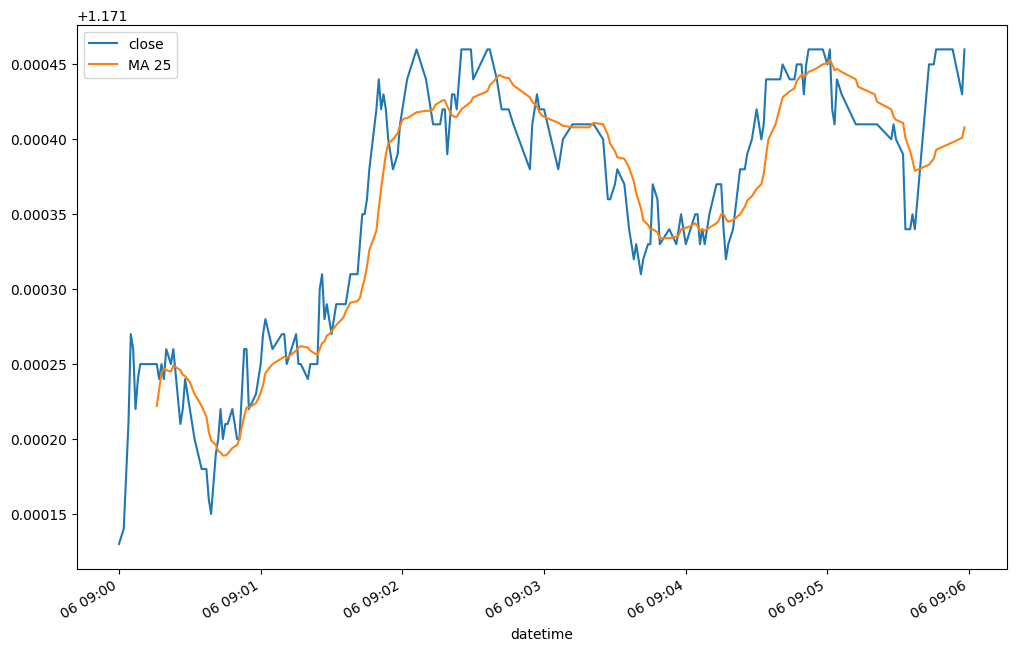

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

eurusd = pd.read_csv(
    "../data/raw/DAT_NT_EURUSD_T_ASK_202601.csv",
    sep=";",
    header=None,
    names=["datetime","ask","volume"],
    parse_dates=["datetime"],
    date_format="%Y%m%d %H%M%S"
)
eurusd = eurusd.set_index("datetime")
eurusd = eurusd["ask"].resample("1s").ohlc().dropna()

day = eurusd.loc["2026-01-06 09:00":"2026-01-06 09:05"]
day[["close"]].plot(figsize=(12, 8), label="Close")
day["close"].rolling(10).mean().plot(label="MA 25")
plt.legend()
plt.savefig("../plots/eda/eurusd_ma.pdf", bbox_inches="tight")
plt.show()

Saved!


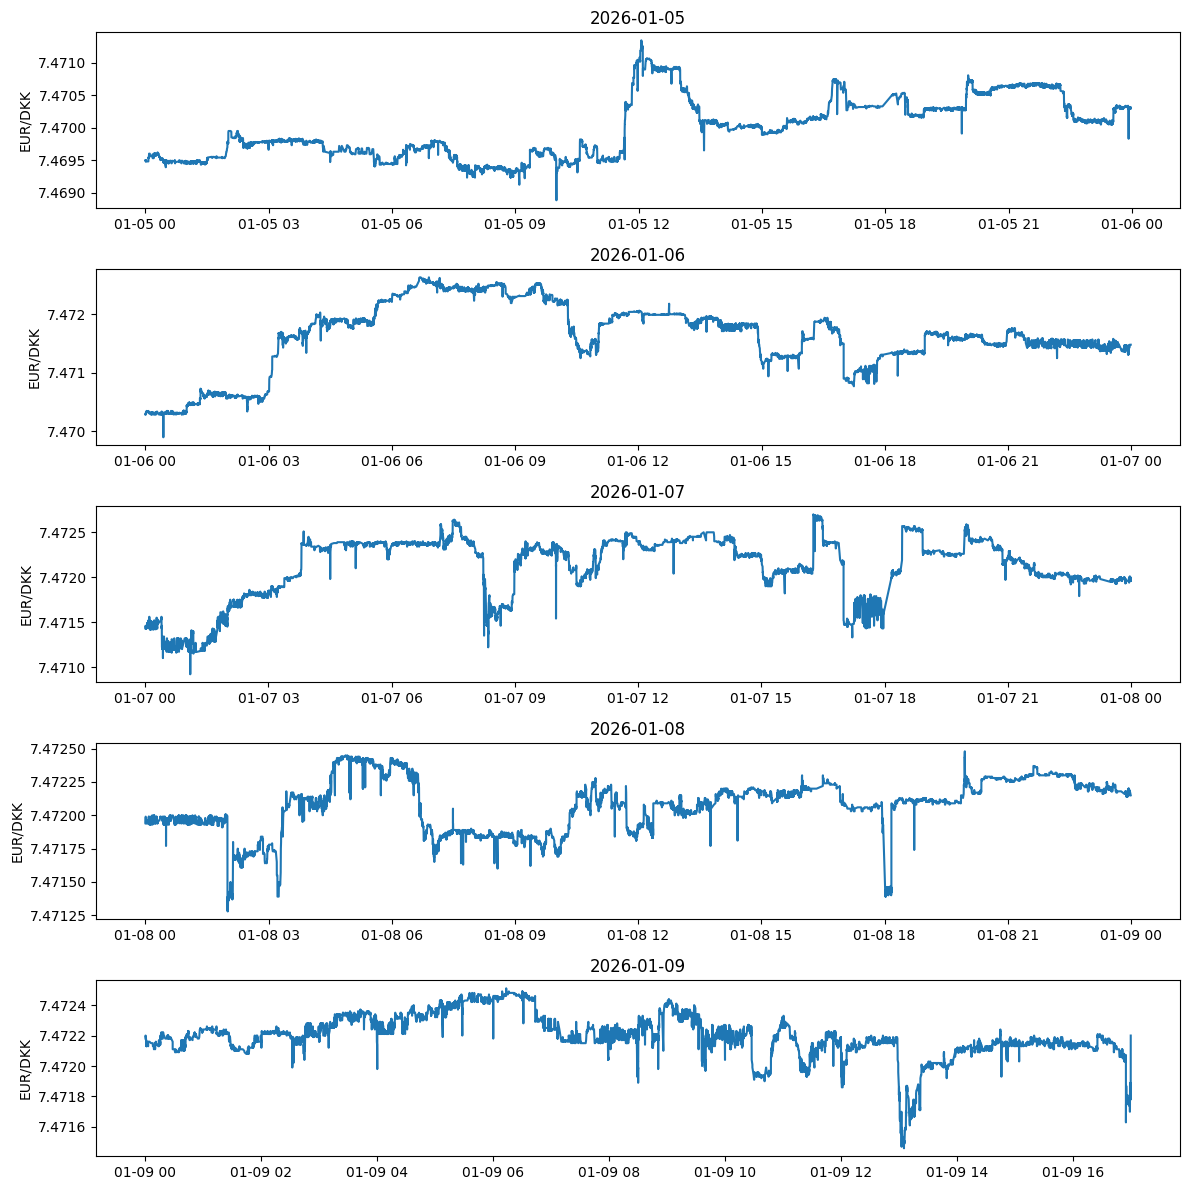

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    "../data/raw/DAT_NT_EURDKK_T_LAST_202601.csv",
    sep=";",
    header=None,
    names=["datetime","last","volume"],
    parse_dates=["datetime"],
    date_format="%Y%m%d %H%M%S",
)

df = df.set_index("datetime")
df = df.drop(columns=["volume"])
df = df.loc["2026-01-05":"2026-01-09"]
df = df["last"].resample("1s").ohlc().dropna()
days = ["2026-01-05", "2026-01-06", "2026-01-07", "2026-01-08", "2026-01-09"]

fig, axes = plt.subplots(len(days), 1, figsize=(12, 12), sharex=False)
for ax, day in zip(axes, days):
    day_data = df.loc[day]
    ax.plot(day_data.index, day_data["close"])
    ax.set_title(day)
    ax.set_ylabel("EUR/DKK")
plt.tight_layout()
fig.savefig("../plots/eda/eurdkk.pdf", bbox_inches="tight")
print("Saved!")
plt.show()



